In [3]:
import requests
import pandas as pd
import numpy as np
import seaborn
import statsmodels.api as sm
from scipy.optimize import minimize_scalar

In [4]:
url = 'https://data.binance.com'
klines_url = '/api/v3/klines'
time_url = '/api/v3/time'

In [41]:
symbol1 = 'BTCUSDT'
symbol2 = 'ETHUSDT'
interval = '1m'  #HOURLY
limit = 1000


In [42]:
params1 = {'symbol': symbol1, 'interval': interval, 'limit': limit}
params2 = {'symbol': symbol2, 'interval': interval, 'limit': limit}

# kline data format
#   [
#     1499040000000,      // Kline open time
#     "0.01634790",       // Open price
#     "0.80000000",       // High price
#     "0.01575800",       // Low price
#     "0.01577100",       // Close price
#     "148976.11427815",  // Volume
#     1499644799999,      // Kline Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "0"                 // Unused field, ignore.
#   ]

klines1 = requests.get(url+klines_url, params1).json()
klines2 = requests.get(url+klines_url, params2).json()

In [43]:
klines_df1 = pd.DataFrame(np.array(klines1), columns=['open_time','open_price','high_price','low_price','close_price','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','unused'])
klines_df2 = pd.DataFrame(np.array(klines2), columns=['open_time','open_price','high_price','low_price','close_price','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','unused'])




In [44]:
klines_df_f1 = pd.DataFrame(klines_df1,dtype='float64')
klines_df_f2 = pd.DataFrame(klines_df2,dtype='float64')
klines_df1

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,unused
0,1680837900000,27988.53000000,27993.42000000,27988.53000000,27992.45000000,12.59340000,1680837959999,352505.19576740,379,6.22204000,174157.86545330,0
1,1680837960000,27992.46000000,27992.46000000,27992.45000000,27992.46000000,3.08687000,1680838019999,86409.07820390,168,2.40724000,67384.56941040,0
2,1680838020000,27992.45000000,27992.46000000,27990.99000000,27991.00000000,10.47190000,1680838079999,293123.92512650,298,3.66013000,102451.61518100,0
3,1680838080000,27990.99000000,27991.00000000,27985.76000000,27985.76000000,5.86931000,1680838139999,164273.59429920,397,2.27466000,63663.59830160,0
4,1680838140000,27985.77000000,27988.80000000,27985.10000000,27988.79000000,8.92163000,1680838199999,249678.59058100,380,6.11743000,171201.62361850,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1680897600000,27897.51000000,27897.52000000,27897.51000000,27897.51000000,4.54094000,1680897659999,126680.95618110,288,3.71217000,103560.33681840,0
996,1680897660000,27897.52000000,27898.48000000,27897.51000000,27898.48000000,3.17260000,1680897719999,88510.08291610,220,2.44732000,68275.99296660,0
997,1680897720000,27898.47000000,27898.49000000,27898.47000000,27898.48000000,6.68271000,1680897779999,186437.45814880,262,3.89493000,108662.64389030,0
998,1680897780000,27898.48000000,27905.98000000,27898.48000000,27905.97000000,7.13587000,1680897839999,199096.52926500,403,5.22503000,145782.68205140,0


In [45]:
klines_df_f1['return'] = (klines_df_f1['close_price']-klines_df_f1['open_price'])/klines_df_f1['open_price']
klines_df_f1['return_next'] = klines_df_f1['return'].shift(-1)
klines_df_f1['open_time_year'] = klines_df_f1['open_time']/1000/3600/24/365
klines_df_f1['return']

klines_df_f2['return'] = (klines_df_f2['close_price']-klines_df_f2['open_price'])/klines_df_f2['open_price']
klines_df_f2['return_next'] = klines_df_f2['return'].shift(-1)
klines_df_f2['open_time_year'] = klines_df_f2['open_time']/1000/3600/24/365
klines_df_f2['return']

0     -0.000075
1     -0.000005
2      0.000000
3     -0.000352
4      0.000181
         ...   
995   -0.000016
996    0.000135
997   -0.000264
998    0.000663
999    0.000102
Name: return, Length: 1000, dtype: float64

In [46]:
returns_df = pd.DataFrame(np.array([klines_df_f1['return'],klines_df_f2['return']]).transpose(),columns=['btc','eth'])
returns_df

,btc,eth
0,1.400574e-04,-0.000075
1,0.000000e+00,-0.000005
2,-5.179968e-05,0.000000
3,-1.868458e-04,-0.000352
4,1.079120e-04,0.000181
...,...,...
995,0.000000e+00,-0.000016
996,3.441166e-05,0.000135
997,3.584426e-07,-0.000264
998,2.684734e-04,0.000663


<AxesSubplot:xlabel='btc', ylabel='eth'>

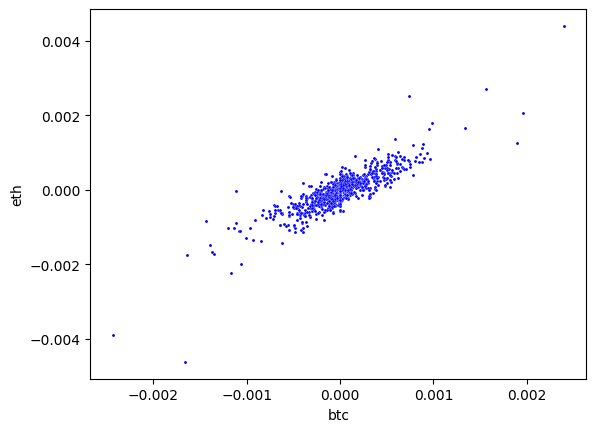

In [47]:
seaborn.scatterplot(data=returns_df,x='btc',y='eth',s=5,color='b')

<AxesSubplot:xlabel='return', ylabel='return_next'>

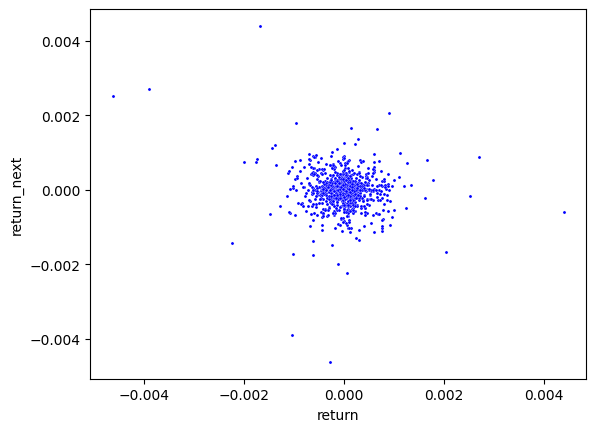

In [48]:
seaborn.scatterplot(data=klines_df_f2,x='return',y='return_next',s=5,color='b')

In [49]:
# f1 price nonstationary
sm.tsa.stattools.adfuller(klines_df_f1['open_price'])

(-2.600899021896514,
 0.09281160022086588,
 11,
 988,
 {'1%': -3.4369860032923145,
  '5%': -2.8644697838498376,
  '10%': -2.5683299626694422},
 7254.448138517151)

In [50]:
# f2 price nonstationary
sm.tsa.stattools.adfuller(klines_df_f2['open_price'])

(-1.9727663422954116,
 0.2986402609120328,
 6,
 993,
 {'1%': -3.4369525024039884,
  '5%': -2.8644550095200705,
  '10%': -2.568322093455802},
 2588.2473626549377)

In [51]:
# f1 return stationary
sm.tsa.stattools.adfuller(klines_df_f1['return'])

(-9.803885167810979,
 5.896043318189511e-17,
 10,
 989,
 {'1%': -3.436979275944879,
  '5%': -2.8644668170148058,
  '10%': -2.5683283824496153},
 -12740.515810112533)

In [52]:
# f2 return stationary
sm.tsa.stattools.adfuller(klines_df_f2['return'])

(-14.423459024342298,
 7.842262043267311e-27,
 5,
 994,
 {'1%': -3.43694584277544,
  '5%': -2.8644520725172873,
  '10%': -2.5683205291305176},
 -12118.327522418344)

In [53]:
# Johansen test
jt = statsmodels.tsa.vector_ar.vecm.coint_johansen(np.array([klines_df_f1['open_price'],klines_df_f2['open_price']]).transpose(),det_order=0,k_ar_diff=1)
print(f'Critical Value Eigen: \n{jt.cvm}\nCritical Value Trace: \n{jt.cvt}\n')
print(f'trace stats: \n{jt.trace_stat}')
                                              

NameError: name 'statsmodels' is not defined

In [54]:
# Spread
df_p1 = klines_df_f1['open_price']
df_p2 = klines_df_f2['open_price']

def spread(p1, p2, n):
    psum = p1-p2*n
    return np.dot(psum,psum)

In [55]:
scalar_results = minimize_scalar(lambda n: spread(df_p1,df_p2, n))
N = scalar_results.x
scalar_results

     fun: 5577980.558727992
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 10
     nit: 4
 success: True
       x: 15.015526865273591

<AxesSubplot:xlabel='open_time', ylabel='price'>

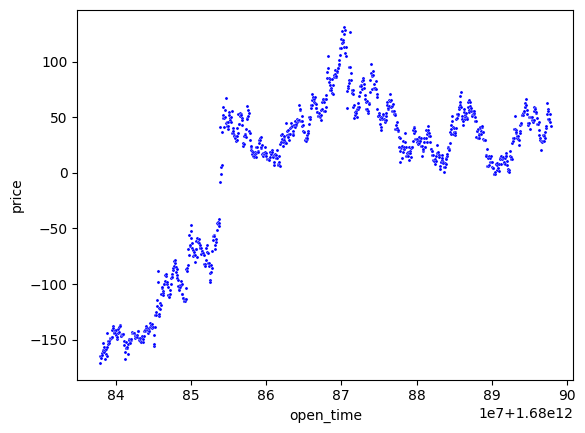

In [56]:
graph_df = pd.DataFrame(np.array([klines_df_f1['open_time'],klines_df_f1['open_price'] - N * klines_df_f2['open_price']]).transpose(),columns = ['open_time','price'])
seaborn.scatterplot(data=graph_df,x='open_time',y='price',s=5,color='b')



<AxesSubplot:xlabel='open_time', ylabel='open_price'>

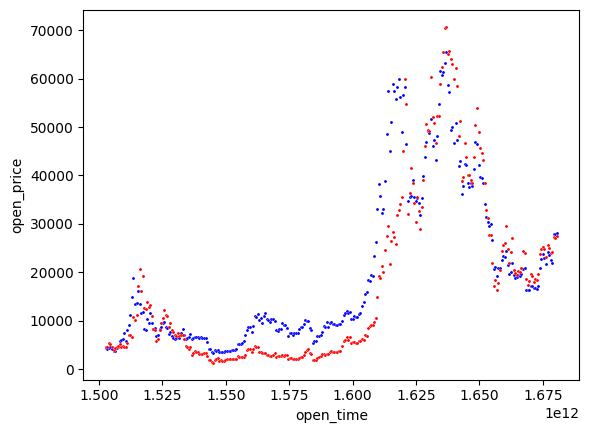

In [21]:
seaborn.scatterplot(data=klines_df_f1,x='open_time',y='open_price',s=5,color='b')
scaled_klines_df_f2 = klines_df_f2.copy()
scaled_klines_df_f2['open_price'] = klines_df_f2['open_price'] * N
seaborn.scatterplot(data=scaled_klines_df_f2,x='open_time',y='open_price',s=5,color='r')


In [182]:
klines_df_f1['open_price']

0      28069.00
1      28055.27
2      28039.50
3      28054.93
4      28054.92
         ...   
995    28005.90
996    28005.75
997    28005.31
998    28005.70
999    28005.70
Name: open_price, Length: 1000, dtype: float64

In [183]:
klines_df_f2['open_price']

0      1892.20
1      1891.74
2      1891.26
3      1892.27
4      1892.43
        ...   
995    1871.47
996    1870.80
997    1871.29
998    1871.69
999    1871.50
Name: open_price, Length: 1000, dtype: float64